In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importation de l'Environnement et des Données


In [2]:
#! pip install xplotter

In [3]:
#! pip install feature_engine
#!pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
feature-engine 1.8.2 requires scikit-learn>=1.4.0, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.


In [4]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime

# Visualisation
import seaborn as sns
from xplotter.insights import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)

# Sélection de variables
import sklearn
import feature_engine

# pour ne pas imprimer les nombres en format scientifique
# et pour imprimer les float avec une précision de 2

#pd.set_option('display.max_columns', 25)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_colwidth', 30)
pd.set_option('display.float_format', '{:,.2f}'.format)

# pour ne pas imprimer les warnings
warnings.filterwarnings('ignore')

# version des librairies utilisées
import sys
print("python version", sys.version)
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("seaborn version :", sns.__version__)
print("sklearn version :", sklearn.__version__)
print("feature_engine version :", feature_engine.__version__)

python version 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
pandas version : 2.2.2
numpy version : 1.26.4
seaborn version : 0.13.2
sklearn version : 1.1.3
feature_engine version : 1.8.2


In [5]:
from scipy.stats import chi2_contingency


In [6]:
# Définir le path pour les fichiers
path = '/content/drive/My Drive/Projets Master/Projet 7/Bases_intermediaires/'

# Importer X_train_join6 et X_test_join6 depuis le path
X_train = pd.read_csv(path + 'X_train_join6.csv')
X_test = pd.read_csv(path + 'X_test_join6.csv')

# Afficher les dimensions pour vérifier l'importation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (307511, 48)
X_test shape: (48744, 47)


In [7]:
y = X_train['TARGET']

X_train.drop(labels='TARGET', axis=1, inplace=True)

In [8]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y shape:", y.shape)

X_train shape: (307511, 47)
X_test shape: (48744, 47)
y shape: (307511,)


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                                  307511 non-null  object 
 2   CODE_GENDER                                         307511 non-null  object 
 3   FLAG_OWN_CAR                                        307511 non-null  object 
 4   FLAG_OWN_REALTY                                     307511 non-null  object 
 5   NAME_INCOME_TYPE                                    307511 non-null  object 
 6   NAME_EDUCATION_TYPE                                 307511 non-null  object 
 7   NAME_FAMILY_STATUS                                  307511 non-null  object 
 8   NAME_HOUSING_TYPE                                   307511 non-n

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 47 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SK_ID_CURR                                          48744 non-null  int64  
 1   NAME_CONTRACT_TYPE                                  48744 non-null  object 
 2   CODE_GENDER                                         48744 non-null  object 
 3   FLAG_OWN_CAR                                        48744 non-null  object 
 4   FLAG_OWN_REALTY                                     48744 non-null  object 
 5   NAME_INCOME_TYPE                                    48744 non-null  object 
 6   NAME_EDUCATION_TYPE                                 48744 non-null  object 
 7   NAME_FAMILY_STATUS                                  48744 non-null  object 
 8   NAME_HOUSING_TYPE                                   48744 non-null  object 


# 1. Variables qualitatives

## 1.a Exploration

In [11]:
liste = X_train.select_dtypes(include='object').columns.to_list()
print("nombre de variables catégorielle :", len(liste), end="\n")
print(liste)

nombre de variables catégorielle : 16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'nbr_enfants', 'taille_famille', 'anciennete_entreprise', 'age_client', 'taux_endettement', 'duree_remboursement', 'total_revenus', 'montant_credit']


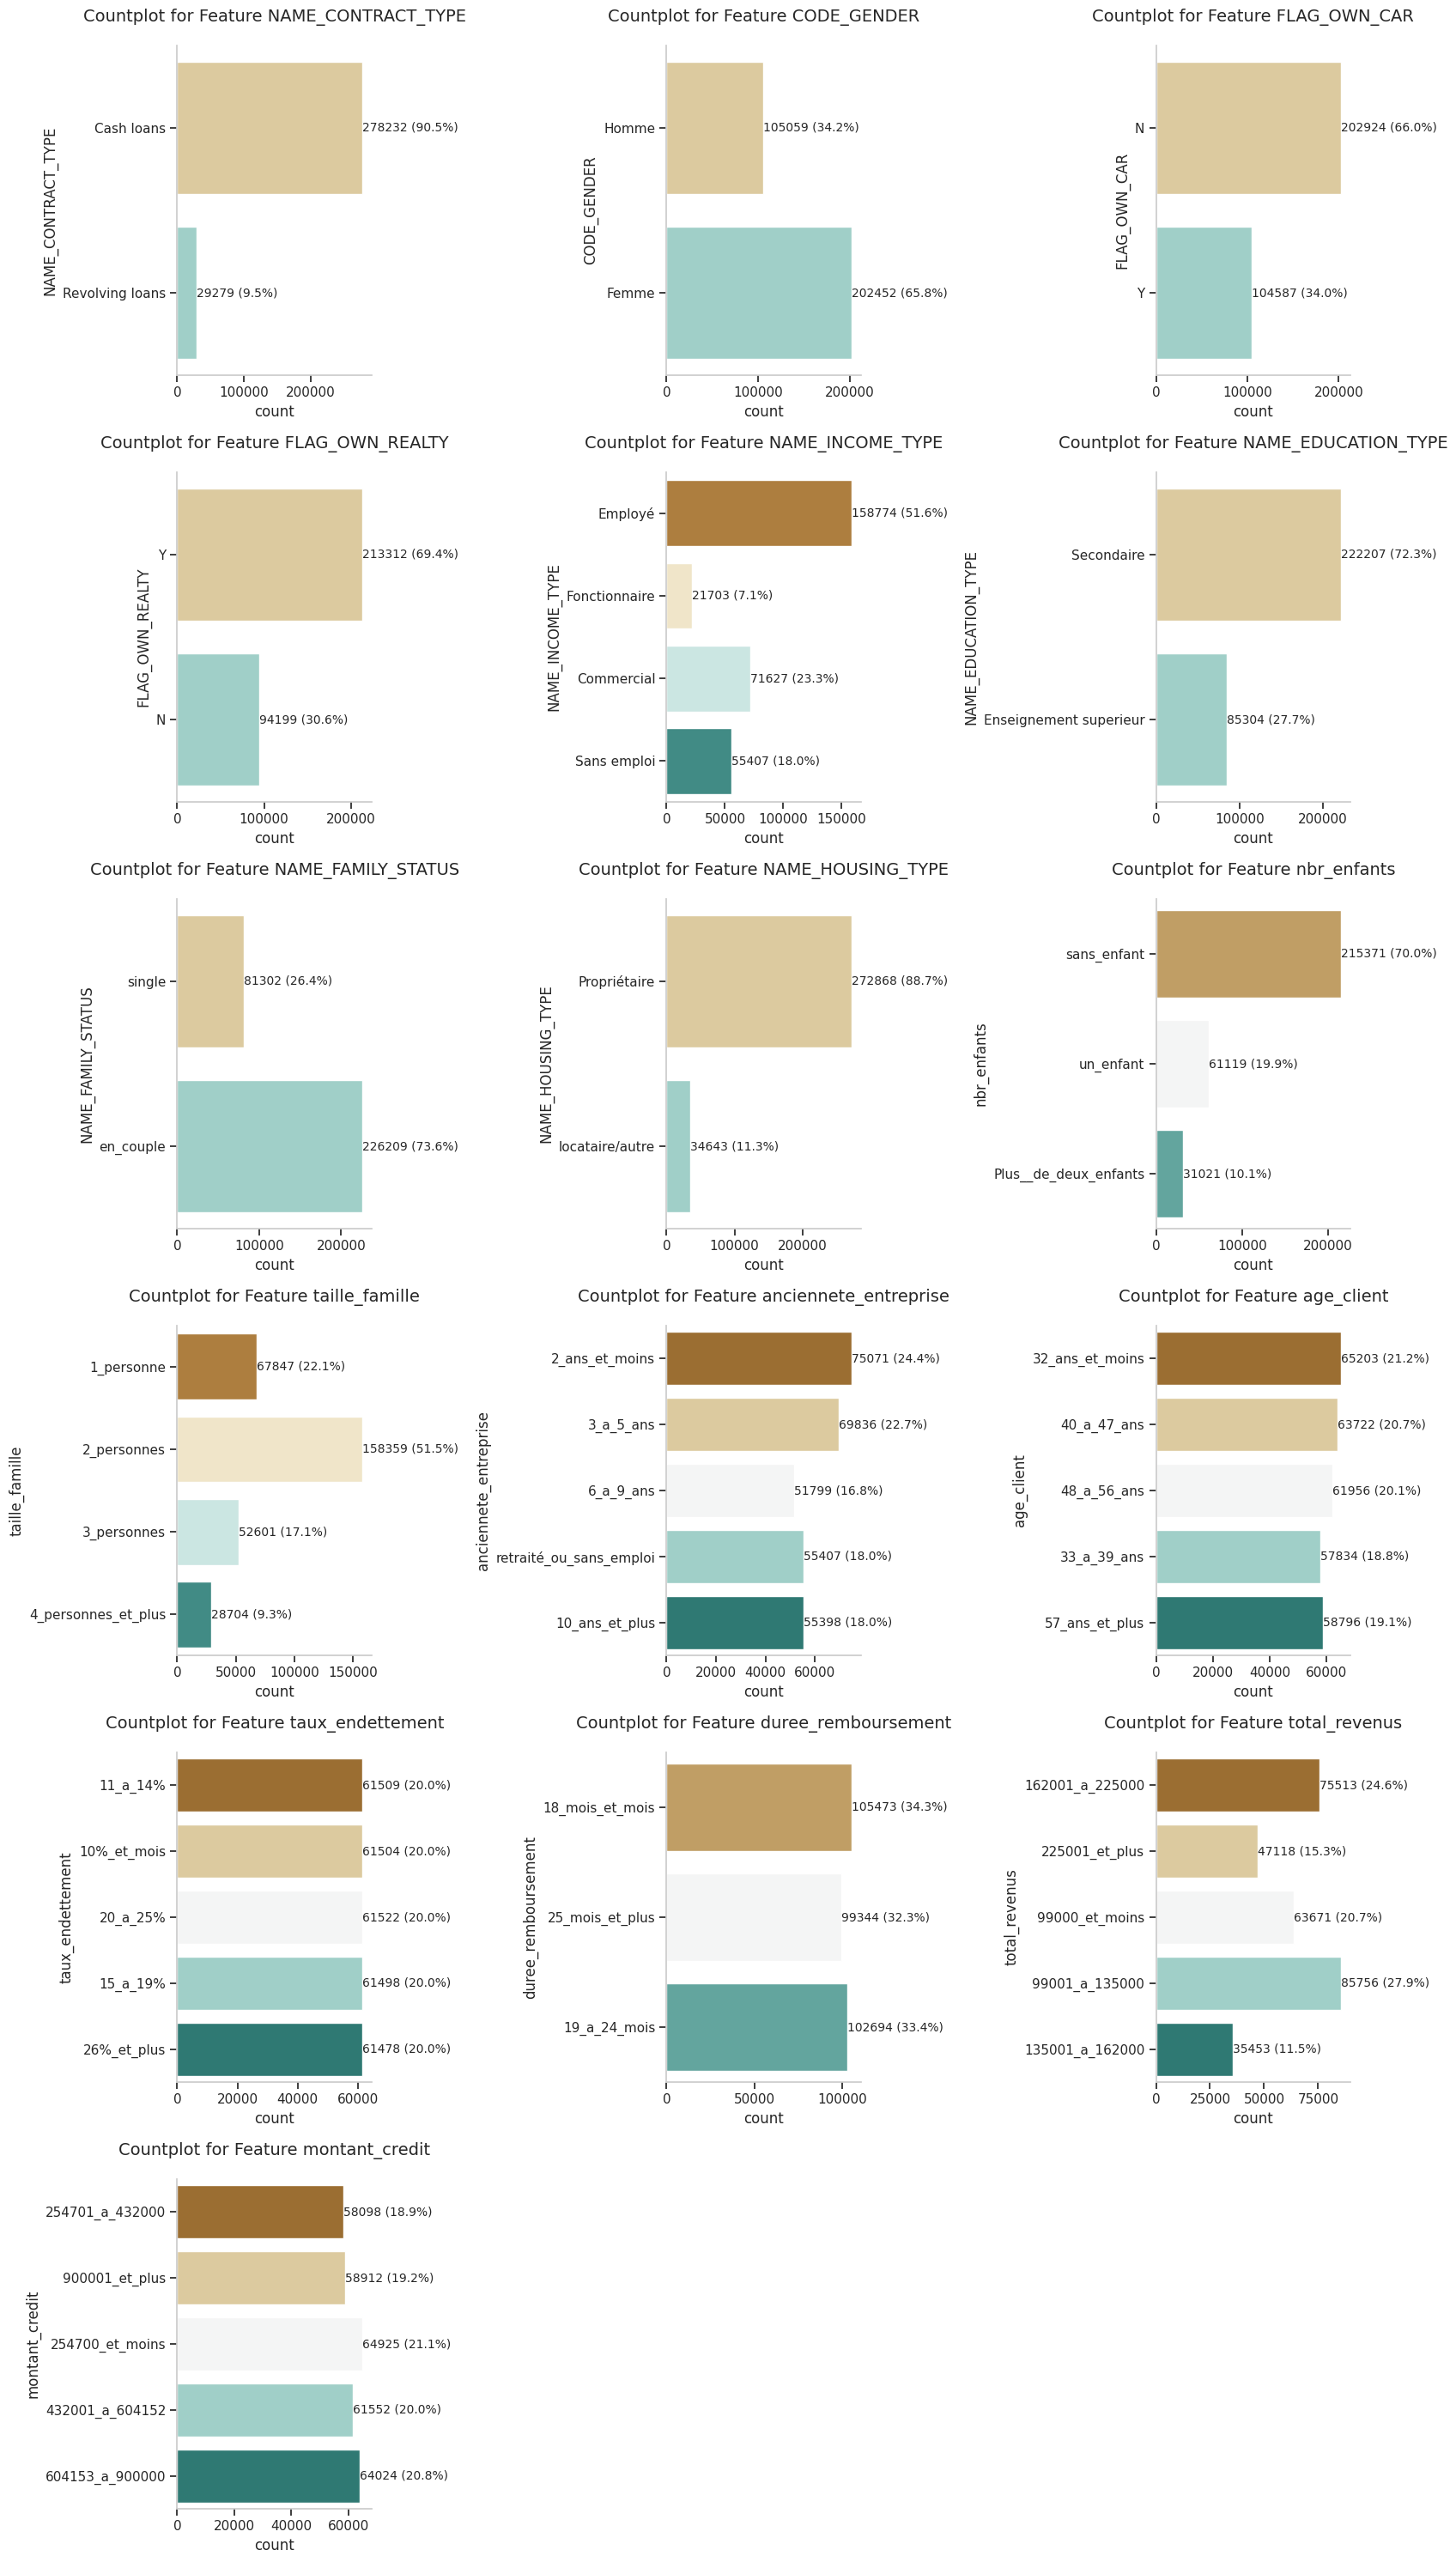

In [12]:
sns.set(style="ticks")

plot_multiple_countplots(df=X_train.select_dtypes(include='object'),
                         n_cols=3,
                         col_list=liste,
                         orient='h',
                         palette="BrBG",
                         size_labels=10,
                         size_title=14)
plt.tight_layout()
plt.show()

In [13]:

chi_ls = []

for feature in X_train.select_dtypes(include='object'):

    # create contingency table
    c = pd.crosstab(y, X_train[feature])

    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

                       p_value
anciennete_entreprise    0.000
age_client               0.000
NAME_INCOME_TYPE         0.000
CODE_GENDER              0.000
NAME_EDUCATION_TYPE      0.000
montant_credit           0.000
duree_remboursement      0.000
NAME_CONTRACT_TYPE       0.000
NAME_HOUSING_TYPE        0.000
total_revenus            0.000
FLAG_OWN_CAR             0.000
nbr_enfants              0.000
taille_famille           0.000
taux_endettement         0.000
NAME_FAMILY_STATUS       0.000
FLAG_OWN_REALTY          0.001


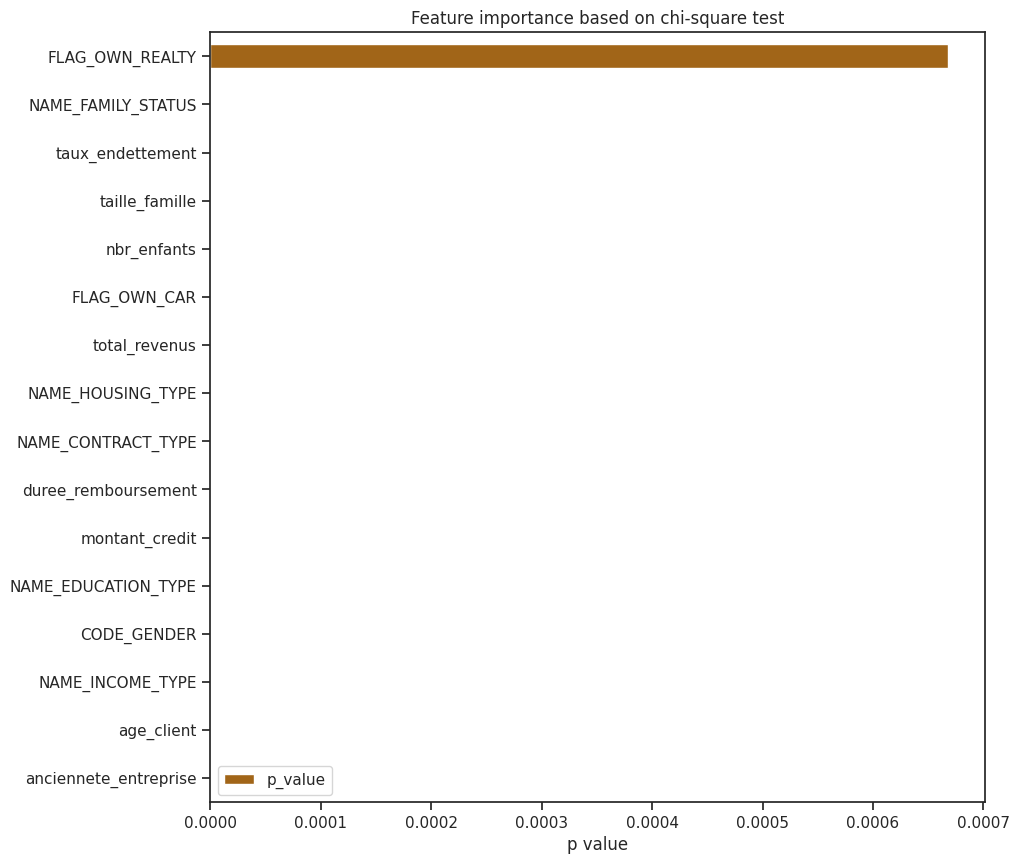

In [14]:
sns.set(style="ticks", rc={'figure.figsize': (10, 10)}, palette="BrBG")

df_pvalue = pd.DataFrame(chi_ls, index=X_train.select_dtypes(include='object').columns, columns=['p_value']).sort_values(by='p_value', ascending=True)

pd.set_option('display.float_format', '{:,.3f}'.format)
print(df_pvalue)

df_pvalue.plot.barh()
plt.xlabel('p value')
plt.title('Feature importance based on chi-square test')
plt.show()

In [15]:
X_train.shape, X_test.shape, y.shape


((307511, 47), (48744, 47), (307511,))

In [16]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                                  307511 non-null  object 
 2   CODE_GENDER                                         307511 non-null  object 
 3   FLAG_OWN_CAR                                        307511 non-null  object 
 4   FLAG_OWN_REALTY                                     307511 non-null  object 
 5   NAME_INCOME_TYPE                                    307511 non-null  object 
 6   NAME_EDUCATION_TYPE                                 307511 non-null  object 
 7   NAME_FAMILY_STATUS                                  307511 non-null  object 
 8   NAME_HOUSING_TYPE                                   307511 non-n

## 1.c Variables categorielles

In [17]:
X_train.drop(columns=['REGION_POPULATION_RELATIVE'], inplace=True)
X_test.drop(columns=['REGION_POPULATION_RELATIVE'], inplace=True)


In [18]:
var_cat_ordinale = ['nbr_enfants', 'taille_famille', 'age_client',
                    'anciennete_entreprise', 'taux_endettement', 'duree_remboursement', 'total_revenus', 'montant_credit']

X_train[var_cat_ordinale] = X_train[var_cat_ordinale].astype('category')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                                              Non-Null Count   Dtype   
---  ------                                              --------------   -----   
 0   SK_ID_CURR                                          307511 non-null  int64   
 1   NAME_CONTRACT_TYPE                                  307511 non-null  object  
 2   CODE_GENDER                                         307511 non-null  object  
 3   FLAG_OWN_CAR                                        307511 non-null  object  
 4   FLAG_OWN_REALTY                                     307511 non-null  object  
 5   NAME_INCOME_TYPE                                    307511 non-null  object  
 6   NAME_EDUCATION_TYPE                                 307511 non-null  object  
 7   NAME_FAMILY_STATUS                                  307511 non-null  object  
 8   NAME_HOUSING_TYPE                                   30

In [19]:
# vérification : les modalités sont-elles reconnues comme ordonnées ?
for s in var_cat_ordinale:
    X_train[s] = X_train[s].cat.as_ordered()
    print(s)
    print(X_train[s], end="\n\n\n")

nbr_enfants
0         sans_enfant
1         sans_enfant
2         sans_enfant
3         sans_enfant
4         sans_enfant
             ...     
307506    sans_enfant
307507    sans_enfant
307508    sans_enfant
307509    sans_enfant
307510    sans_enfant
Name: nbr_enfants, Length: 307511, dtype: category
Categories (3, object): ['Plus__de_deux_enfants' < 'sans_enfant' < 'un_enfant']


taille_famille
0          1_personne
1         2_personnes
2          1_personne
3         2_personnes
4          1_personne
             ...     
307506     1_personne
307507     1_personne
307508     1_personne
307509    2_personnes
307510    2_personnes
Name: taille_famille, Length: 307511, dtype: category
Categories (4, object): ['1_personne' < '2_personnes' < '3_personnes' < '4_personnes_et_plus']


age_client
0         32_ans_et_moins
1             40_a_47_ans
2             48_a_56_ans
3             48_a_56_ans
4             48_a_56_ans
               ...       
307506    32_ans_et_moins
307507     5

In [20]:
cat_ordinale = ['taille_famille', 'age_client', 'taux_endettement',
                'duree_remboursement', 'montant_credit']

for s in cat_ordinale:
    X_train[s] = X_train[s].cat.codes

In [21]:
var_cat_ordinale = ['nbr_enfants', 'taille_famille', 'age_client',
                    'anciennete_entreprise', 'taux_endettement', 'duree_remboursement', 'total_revenus', 'montant_credit']

X_test[var_cat_ordinale] = X_test[var_cat_ordinale].astype('category')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 46 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   SK_ID_CURR                                          48744 non-null  int64   
 1   NAME_CONTRACT_TYPE                                  48744 non-null  object  
 2   CODE_GENDER                                         48744 non-null  object  
 3   FLAG_OWN_CAR                                        48744 non-null  object  
 4   FLAG_OWN_REALTY                                     48744 non-null  object  
 5   NAME_INCOME_TYPE                                    48744 non-null  object  
 6   NAME_EDUCATION_TYPE                                 48744 non-null  object  
 7   NAME_FAMILY_STATUS                                  48744 non-null  object  
 8   NAME_HOUSING_TYPE                                   48744 non-null

In [22]:
for s in cat_ordinale:
    X_test[s] = X_test[s].cat.codes

In [23]:
enf_map = {'sans_enfant': 0,
           'un_enfant': 1,
           'Plus__de_deux_enfants': 2}

X_train['nbr_enfants'] = X_train['nbr_enfants'].map(enf_map)
X_test['nbr_enfants'] = X_test['nbr_enfants'].map(enf_map)

In [24]:
anc_ent = {'retraité_ou_sans_emploi': 0,
           '2_ans_et_moins': 1,
           '3_a_5_ans': 2,
           '6_a_9_ans': 3,
           '10_ans_et_plus': 4
           }

X_train['anciennete_entreprise'] = X_train['anciennete_entreprise'].map(anc_ent)
X_test['anciennete_entreprise'] = X_test['anciennete_entreprise'].map(anc_ent)

In [25]:
tot_rev = {'99000_et_moins': 0,
           '99001_a_135000': 1,
           '135001_a_162000': 2,
           '162001_a_225000': 3,
           '225001_et_plus': 4
           }

X_train['total_revenus'] = X_train['total_revenus'].map(tot_rev)
X_test['total_revenus'] = X_test['total_revenus'].map(tot_rev)

In [26]:
def cat_analyzer(dataframe, variable):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe) *100}), end="\n\n\n")


for i in var_cat_ordinale:
    cat_analyzer(X_train, i)

nbr_enfants
              COUNT  RATIO
nbr_enfants               
0            215371 70.037
1             61119 19.875
2             31021 10.088


taille_famille
                 COUNT  RATIO
taille_famille               
1               158359 51.497
0                67847 22.063
2                52601 17.105
3                28704  9.334


age_client
            COUNT  RATIO
age_client              
0           65203 21.203
2           63722 20.722
3           61956 20.148
4           58796 19.120
1           57834 18.807


anciennete_entreprise
                       COUNT  RATIO
anciennete_entreprise              
1                      75071 24.412
2                      69836 22.710
0                      55407 18.018
4                      55398 18.015
3                      51799 16.845


taux_endettement
                  COUNT  RATIO
taux_endettement              
3                 61522 20.006
1                 61509 20.002
0                 61504 20.001
2                 

In [27]:
var_cat = X_train.select_dtypes(include='category').columns.to_list()

X_train[var_cat] = X_train[var_cat].astype('uint8')

In [28]:
var_cat = X_test.select_dtypes(include='category').columns.to_list()

X_test[var_cat] = X_test[var_cat].astype('uint8')

In [29]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                                  307511 non-null  object 
 2   CODE_GENDER                                         307511 non-null  object 
 3   FLAG_OWN_CAR                                        307511 non-null  object 
 4   FLAG_OWN_REALTY                                     307511 non-null  object 
 5   NAME_INCOME_TYPE                                    307511 non-null  object 
 6   NAME_EDUCATION_TYPE                                 307511 non-null  object 
 7   NAME_FAMILY_STATUS                                  307511 non-null  object 
 8   NAME_HOUSING_TYPE                                   307511 non-n

In [30]:
var_cat_nominale = X_train.select_dtypes(include='object').columns.to_list()
print(var_cat_nominale)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']


In [31]:
X_train = pd.get_dummies(X_train,
                         columns=var_cat_nominale,
                         drop_first=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          307511 non-null  int64  
 1   FLAG_EMP_PHONE                                      307511 non-null  int64  
 2   FLAG_WORK_PHONE                                     307511 non-null  int64  
 3   EXT_SOURCE_2                                        307511 non-null  float64
 4   FLAG_DOCUMENT_3                                     307511 non-null  int64  
 5   FLAG_DOCUMENT_6                                     307511 non-null  int64  
 6   FLAG_DOCUMENT_8                                     307511 non-null  int64  
 7   nbr_enfants                                         307511 non-null  uint8  
 8   taille_famille                                      307511 non-n

In [32]:
# Transformation des variables booléennes en int8 dans X_train
bool_columns = [
    'NAME_CONTRACT_TYPE_Revolving loans',
    'CODE_GENDER_Homme',
    'FLAG_OWN_CAR_Y',
    'FLAG_OWN_REALTY_Y',
    'NAME_INCOME_TYPE_Employé',
    'NAME_INCOME_TYPE_Fonctionnaire',
    'NAME_INCOME_TYPE_Sans emploi',
    'NAME_EDUCATION_TYPE_Secondaire',
    'NAME_FAMILY_STATUS_single',
    'NAME_HOUSING_TYPE_locataire/autre'
]

# Conversion des colonnes booléennes en int8
X_train[bool_columns] = X_train[bool_columns].astype('uint8')

# Vérification des types après transformation
print(X_train[bool_columns].dtypes)


NAME_CONTRACT_TYPE_Revolving loans    uint8
CODE_GENDER_Homme                     uint8
FLAG_OWN_CAR_Y                        uint8
FLAG_OWN_REALTY_Y                     uint8
NAME_INCOME_TYPE_Employé              uint8
NAME_INCOME_TYPE_Fonctionnaire        uint8
NAME_INCOME_TYPE_Sans emploi          uint8
NAME_EDUCATION_TYPE_Secondaire        uint8
NAME_FAMILY_STATUS_single             uint8
NAME_HOUSING_TYPE_locataire/autre     uint8
dtype: object


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          307511 non-null  int64  
 1   FLAG_EMP_PHONE                                      307511 non-null  int64  
 2   FLAG_WORK_PHONE                                     307511 non-null  int64  
 3   EXT_SOURCE_2                                        307511 non-null  float64
 4   FLAG_DOCUMENT_3                                     307511 non-null  int64  
 5   FLAG_DOCUMENT_6                                     307511 non-null  int64  
 6   FLAG_DOCUMENT_8                                     307511 non-null  int64  
 7   nbr_enfants                                         307511 non-null  uint8  
 8   taille_famille                                      307511 non-n

In [34]:
var_cat_nominale = X_test.select_dtypes(include='object').columns.to_list()
print(var_cat_nominale)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']


In [35]:
X_test = pd.get_dummies(X_test,
                         columns=var_cat_nominale,
                         drop_first=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 48 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SK_ID_CURR                                          48744 non-null  int64  
 1   FLAG_EMP_PHONE                                      48744 non-null  int64  
 2   FLAG_WORK_PHONE                                     48744 non-null  int64  
 3   EXT_SOURCE_2                                        48744 non-null  float64
 4   FLAG_DOCUMENT_3                                     48744 non-null  int64  
 5   FLAG_DOCUMENT_6                                     48744 non-null  int64  
 6   FLAG_DOCUMENT_8                                     48744 non-null  int64  
 7   nbr_enfants                                         48744 non-null  uint8  
 8   taille_famille                                      48744 non-null  int8   


In [36]:
# Transformation des variables booléennes en int8 dans X_train
bool_columns = [
    'NAME_CONTRACT_TYPE_Revolving loans',
    'CODE_GENDER_Homme',
    'FLAG_OWN_CAR_Y',
    'FLAG_OWN_REALTY_Y',
    'NAME_INCOME_TYPE_Employé',
    'NAME_INCOME_TYPE_Fonctionnaire',
    'NAME_INCOME_TYPE_Sans emploi',
    'NAME_EDUCATION_TYPE_Secondaire',
    'NAME_FAMILY_STATUS_single',
    'NAME_HOUSING_TYPE_locataire/autre'
]

# Conversion des colonnes booléennes en int8
X_test[bool_columns] = X_test[bool_columns].astype('uint8')

# Vérification des types après transformation
print(X_test[bool_columns].dtypes)

NAME_CONTRACT_TYPE_Revolving loans    uint8
CODE_GENDER_Homme                     uint8
FLAG_OWN_CAR_Y                        uint8
FLAG_OWN_REALTY_Y                     uint8
NAME_INCOME_TYPE_Employé              uint8
NAME_INCOME_TYPE_Fonctionnaire        uint8
NAME_INCOME_TYPE_Sans emploi          uint8
NAME_EDUCATION_TYPE_Secondaire        uint8
NAME_FAMILY_STATUS_single             uint8
NAME_HOUSING_TYPE_locataire/autre     uint8
dtype: object


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          307511 non-null  int64  
 1   FLAG_EMP_PHONE                                      307511 non-null  int64  
 2   FLAG_WORK_PHONE                                     307511 non-null  int64  
 3   EXT_SOURCE_2                                        307511 non-null  float64
 4   FLAG_DOCUMENT_3                                     307511 non-null  int64  
 5   FLAG_DOCUMENT_6                                     307511 non-null  int64  
 6   FLAG_DOCUMENT_8                                     307511 non-null  int64  
 7   nbr_enfants                                         307511 non-null  uint8  
 8   taille_famille                                      307511 non-n

# FILTRAGE pour la selection des variables

## Verification des colonnes presque cst

In [38]:
# create an empty list
quasi_constant_feat = []

# iterate over every feature
for feature in X_train.columns:

    # find the predominant value, that is the value that is shared
    # by most observations
    predominant = X_train[feature].value_counts(
        normalize=True).sort_values(ascending=False).values[0]

    # evaluate the predominant feature: do more than 99% of the observations
    # show 1 value?
    if predominant > 0.998:

        # if yes, add the variable to the list
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

## doublons ?

In [39]:
# vérifier les variables dupliquées dans l'ensemble d'entraînement :

# créer un dictionnaire vide où nous allons stocker
# les groupes de variables dupliquées
duplicated_feat_pairs = {}

# créer une liste vide pour collecter les variables
# qui ont été identifiées comme dupliquées
_duplicated_feat = []

# itérer sur chaque variable dans notre ensemble de données :
for i in range(0, len(X_train.columns)):

    # ce bit aide à suivre l'avancement de la boucle :
    if i % 10 == 0:
        print(i)

    # choisir une variable :
    feat_1 = X_train.columns[i]

    # vérifier si cette variable a déjà été identifiée
    # comme un doublon d'une autre. Si c'est le cas, elle devrait être stockée
    # dans notre liste `_duplicated_feat`.

    # Si cette variable a déjà été identifiée comme un doublon, on l'ignore.
    # Si elle n'a pas encore été identifiée comme un doublon, on continue :
    if feat_1 not in _duplicated_feat:

        # créer une liste vide comme entrée pour cette variable dans le dictionnaire :
        duplicated_feat_pairs[feat_1] = []

        # maintenant, itérer sur les variables restantes de l'ensemble de données :
        for feat_2 in X_train.columns[i + 1:]:

            # vérifier si cette seconde variable est identique à la première
            if X_train[feat_1].equals(X_train[feat_2]):

                # si elle est identique, l'ajouter à la liste dans le dictionnaire
                duplicated_feat_pairs[feat_1].append(feat_2)

                # et l'ajouter à notre liste de suivi des variables dupliquées
                _duplicated_feat.append(feat_2)

                # terminé !


0
10
20
30
40


In [40]:
len(_duplicated_feat)

0

## Valeur NAN ?

In [41]:
# Vérification de la présence de valeurs manquantes (NaN) dans X_train
nan_summary = X_train.isnull().sum()

# Filtrer pour ne garder que les colonnes contenant des NaN
columns_with_nan = nan_summary[nan_summary > 0]

# Afficher les colonnes avec des NaN et leur nombre
print("Colonnes contenant des NaN dans X_train :")
print(columns_with_nan)


Colonnes contenant des NaN dans X_train :
Series([], dtype: int64)


## Analyse des correlations

In [42]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection


In [43]:
# set up the selector

selec = DropCorrelatedFeatures(threshold=0.8,
                               method='spearman',
                               missing_values='ignore'
                               )


# find correlated features

selec.fit(X_train)

DropCorrelatedFeatures(method='spearman')

In [44]:
# chaque ensemble contient un groupe de caractéristiques corrélées

selec.correlated_feature_sets_

[{'FLAG_EMP_PHONE', 'NAME_INCOME_TYPE_Sans emploi'},
 {'nbr_enfants', 'taille_famille'}]

In [45]:
# correlation selector

sel = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance",
    estimator=None,
    scoring="roc_auc",
    cv=3,
)

sel.fit(X_train,y)

SmartCorrelatedSelection(missing_values='raise', selection_method='variance')

In [46]:
# Convertir le set en liste
group = list(sel.correlated_feature_sets_[0])

# Calculer l'écart type des colonnes dans le groupe
X_train[group].std()


,0
taille_famille,0.864
nbr_enfants,0.665


In [47]:
# Convertir le set en liste
group = list(sel.correlated_feature_sets_[1])

# Calculer l'écart type des colonnes dans le groupe
X_train[group].std()


,0
NAME_INCOME_TYPE_Sans emploi,0.384
FLAG_EMP_PHONE,0.384


In [48]:
sel.features_to_drop_


['nbr_enfants', 'FLAG_EMP_PHONE']

In [49]:
L=['nbr_enfants', 'FLAG_EMP_PHONE']

In [50]:
# Liste des colonnes à supprimer
columns_to_drop = ['nbr_enfants', 'FLAG_EMP_PHONE']

# Supprimer les colonnes de X_train et X_test
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Vérifier la forme des DataFrames après suppression
print("Nouvelle forme de X_train :", X_train.shape)
print("Nouvelle forme de X_test :", X_test.shape)

Nouvelle forme de X_train : (307511, 46)
Nouvelle forme de X_test : (48744, 46)


In [51]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 46 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SK_ID_CURR                                          48744 non-null  int64  
 1   FLAG_WORK_PHONE                                     48744 non-null  int64  
 2   EXT_SOURCE_2                                        48744 non-null  float64
 3   FLAG_DOCUMENT_3                                     48744 non-null  int64  
 4   FLAG_DOCUMENT_6                                     48744 non-null  int64  
 5   FLAG_DOCUMENT_8                                     48744 non-null  int64  
 6   taille_famille                                      48744 non-null  int8   
 7   anciennete_entreprise                               48744 non-null  uint8  
 8   age_client                                          48744 non-null  int8   


Les méthodes de filtrage sont des techniques de sélection de variables qui évaluent la pertinence des features indépendamment de tout modèle. Elles se basent sur des propriétés statistiques des données, comme les corrélations, la variance ou des tests statistiques. Ces méthodes permettent une première réduction rapide du nombre de variables explicatives en éliminant celles qui sont peu informatives.

Elles sont pertinentes dans notre étude car elles permettent de réduire la dimensionnalité des données et d'améliorer la qualité de l'entraînement du modèle. En éliminant les variables non pertinentes, nous limitons le bruit dans les données et réduisons les risques de surajustement, tout en accélérant les calculs lors de la modélisation.

Cependant, les méthodes de filtrage ont des limites. Elles ne prennent pas en compte l'interaction entre les variables, ce qui peut conduire à l'élimination de variables importantes dans un contexte combiné. De plus, elles ne tiennent pas compte de la relation directe avec le modèle final, ce qui peut entraîner des choix sous-optimaux pour certaines tâches de machine learning.


# 3. Standardisation de notre jeu de données

## 3.a seraparation train validation

In [52]:
from sklearn.model_selection import train_test_split

X_Xtrain, X_valid, y_train, y_valid = train_test_split(X_train, y, stratify=y, test_size=0.3, random_state=12)

X_Xtrain.shape, X_valid.shape

((215257, 46), (92254, 46))

In [53]:
print("y_train - TARGET")
print(pd.DataFrame({
    "COUNT": y_train.value_counts(),
    "RATIO": y_train.value_counts() / len(y_train) * 100}))

y_train - TARGET
         COUNT  RATIO
TARGET               
0       197880 91.927
1        17377  8.073


In [54]:
print("y_valid - TARGET")
print(pd.DataFrame({
    "COUNT": y_valid.value_counts(),
    "RATIO": y_valid.value_counts() / len(y_valid) * 100}))

y_valid - TARGET
        COUNT  RATIO
TARGET              
0       84806 91.927
1        7448  8.073


## 3.a Standardisation des variables explicativex

**Pourquoi faire la standardisation ?**

La **standardisation** est une étape importante dans le traitement des données lorsque nous utilisons des modèles de machine learning. Voici les principales raisons pour lesquelles elle est nécessaire :

1. **Aligner les échelles des variables :**  
   Dans un dataset, certaines variables peuvent avoir des échelles très différentes. Par exemple, une variable représentant un montant en euros peut varier entre 0 et 1 000 000, tandis qu'une autre variable comme l'âge peut varier entre 0 et 100. Ces écarts d'échelle peuvent causer des problèmes pour de nombreux algorithmes.

2. **Améliorer la performance des modèles sensibles aux échelles :**  
   Certains algorithmes de machine learning (comme la régression logistique, les SVM, les k-NN et les réseaux neuronaux) sont sensibles à l'échelle des variables. Si les variables ne sont pas standardisées, les caractéristiques ayant de grandes valeurs numériques domineront celles ayant de plus petites valeurs.

3. **Convergence plus rapide pour les modèles :**  
   Dans les algorithmes d’optimisation (comme dans les réseaux neuronaux ou les descentes de gradient), la standardisation aide les modèles à converger plus rapidement en réduisant les disparités entre les échelles des variables.

4. **Signification statistique uniforme :**  
   La standardisation transforme les données pour qu'elles aient une moyenne de 0 et un écart-type de 1. Cela permet de comparer directement l'importance relative des variables et d’interpréter plus facilement leurs impacts dans les modèles linéaires.

5. **Utilisation efficace de la distance :**  
   Pour les modèles basés sur des distances (comme k-NN ou les algorithmes de clustering), la standardisation est essentielle. Sinon, une variable ayant une grande échelle pourrait dominer le calcul des distances, rendant les autres variables insignifiantes.

**Conclusion :**  
La standardisation garantit que toutes les variables ont un impact équitable sur le modèle, améliore la convergence des algorithmes et optimise la performance de votre système de machine learning.


In [55]:
X_Xtrain.info()


<class 'pandas.core.frame.DataFrame'>
Index: 215257 entries, 62341 to 287997
Data columns (total 46 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          215257 non-null  int64  
 1   FLAG_WORK_PHONE                                     215257 non-null  int64  
 2   EXT_SOURCE_2                                        215257 non-null  float64
 3   FLAG_DOCUMENT_3                                     215257 non-null  int64  
 4   FLAG_DOCUMENT_6                                     215257 non-null  int64  
 5   FLAG_DOCUMENT_8                                     215257 non-null  int64  
 6   taille_famille                                      215257 non-null  int8   
 7   anciennete_entreprise                               215257 non-null  uint8  
 8   age_client                                          215257 non-nu

In [56]:

# SCALE DATA / Mise à l'échelle des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_Xtrain.drop(labels='SK_ID_CURR', axis=1))

X_train_sd = scaler.transform(X_Xtrain.drop(labels='SK_ID_CURR', axis=1))
X_valid_sd = scaler.transform(X_valid.drop(labels='SK_ID_CURR', axis=1))

In [57]:
# vérification

X_train_sd.mean(), X_train_sd.std()

(1.564481884784897e-17, 0.9999999999999993)

In [58]:
X_valid_sd.mean(), X_valid_sd.std()


(0.0012062663380406375, 1.0012951363156815)

# methodes wrapper

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

**Méthodes Wrapper**

Les méthodes Wrapper sont des techniques de sélection de variables qui évaluent directement les performances d'un modèle en incluant ou en excluant certaines variables. Ces méthodes "enveloppent" un modèle de machine learning, testant des sous-ensembles de variables et optimisant le modèle pour maximiser les performances (par exemple, une métrique comme l'accuracy ou le score AUC).

Elles incluent deux approches principales :
- **Step Forward Selection (Sélection avant)**
- **Step Backward Selection (Sélection arrière)**

Les méthodes Wrapper ont l'avantage d'identifier les variables qui maximisent directement les performances du modèle, mais elles peuvent être coûteuses en calcul, car elles nécessitent plusieurs entraînements du modèle.

---


## 4.a Step Forward Feature Selection(Sélection progressive vers l'avant)





La **Step Forward Selection** est une méthode itérative qui commence avec un modèle vide (aucune variable) et ajoute progressivement les variables une par une, en choisissant à chaque itération la variable qui améliore le plus les performances du modèle.

1. **Départ :** Commencez avec un modèle vide (aucune variable sélectionnée).
2. **Itération :** Ajoutez une variable parmi celles restantes qui améliore le plus les performances selon une métrique choisie (par exemple, AUC ou précision).
3. **Arrêt :** La méthode s'arrête lorsque :
   - Ajouter une nouvelle variable n'améliore plus les performances du modèle.
   - Une limite prédéfinie (comme le nombre de variables) est atteinte.

**Avantages :**
- Simple et interprétable.
- Moins coûteuse que la méthode exhaustive (tester toutes les combinaisons possibles).

**Inconvénients :**
- Peut manquer des interactions complexes entre variables.
- Sensible aux variables redondantes ou très corrélées.

---


In [60]:
# Transformation des matrices en dataframe pour avoir les noms des variables

X_train_sd_df = pd.DataFrame(X_train_sd, columns=list(X_Xtrain.drop(labels='SK_ID_CURR', axis=1)))
X_train_sd_df.head()

,FLAG_WORK_PHONE,EXT_SOURCE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,taille_famille,anciennete_entreprise,age_client,taux_endettement,duree_remboursement,...,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_Homme,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Employé,NAME_INCOME_TYPE_Fonctionnaire,NAME_INCOME_TYPE_Sans emploi,NAME_EDUCATION_TYPE_Secondaire,NAME_FAMILY_STATUS_single,NAME_HOUSING_TYPE_locataire/autre
0,-0.499,0.588,0.639,-0.311,-0.297,-0.157,0.794,-0.687,1.415,-1.201,...,-0.325,-0.719,-0.717,0.664,-1.033,-0.275,-0.470,0.619,-0.600,-0.356
1,-0.499,1.031,0.639,-0.311,-0.297,-0.157,-0.678,0.726,-0.708,-1.201,...,-0.325,1.391,1.394,0.664,0.969,-0.275,-0.470,0.619,-0.600,-0.356
2,-0.499,-1.679,0.639,-0.311,-0.297,-1.314,0.058,0.019,0.708,1.251,...,-0.325,-0.719,-0.717,-1.505,-1.033,-0.275,-0.470,-1.615,1.666,-0.356
3,-0.499,0.185,0.639,-0.311,-0.297,-0.157,0.794,0.726,-1.415,-1.201,...,-0.325,1.391,1.394,-1.505,0.969,-0.275,-0.470,0.619,-0.600,-0.356
4,-0.499,-1.784,0.639,-0.311,-0.297,1.000,-0.678,-0.687,-0.000,-1.201,...,-0.325,-0.719,-0.717,-1.505,0.969,-0.275,-0.470,0.619,1.666,2.809


In [61]:
X_train_sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215257 entries, 0 to 215256
Data columns (total 45 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   FLAG_WORK_PHONE                                     215257 non-null  float64
 1   EXT_SOURCE_2                                        215257 non-null  float64
 2   FLAG_DOCUMENT_3                                     215257 non-null  float64
 3   FLAG_DOCUMENT_6                                     215257 non-null  float64
 4   FLAG_DOCUMENT_8                                     215257 non-null  float64
 5   taille_famille                                      215257 non-null  float64
 6   anciennete_entreprise                               215257 non-null  float64
 7   age_client                                          215257 non-null  float64
 8   taux_endettement                                    215257 non-n

In [81]:
y_train_series = pd.Series(y_train)
y_train_series.head()

,TARGET
62341,0
212900,0
201177,0
292653,0
250703,0


In [ ]:
# modèle forward sélection
sfs1 = SFS(RandomForestClassifier(n_estimators=10, random_state=12),
           k_features="best",
           forward=True,
           floating=False,
           scoring='roc_auc',
           cv=5,
           n_jobs=-2
         )

In [ ]:
sfs1 = sfs1.fit(X_train_sd_df, y_train_series)
sfs1.subsets_

In [ ]:
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df.head()

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev', figsize=(14, 6))

plt.ylim([0.575, 2])
plt.title('Sequential Forward Selection (w. StdDev)', fontsize=18, fontstyle='italic', fontweight='bold')
plt.show()

In [ ]:
selected_feature_sfs1 = list(sfs1.k_feature_names_)

print(f"Nombre de variables sélectionnées : {len(selected_feature_sfs1)}")
print(selected_feature_sfs1)

## 4.b Step backward Feature Selection(Sélection progressive vers l'arrière)




La **Step Backward Selection** est une méthode itérative qui commence avec toutes les variables disponibles et les supprime une par une, en éliminant à chaque itération la variable dont l'exclusion améliore le plus les performances du modèle.

1. **Départ :** Commencez avec toutes les variables dans le modèle.
2. **Itération :** Supprimez la variable dont l'exclusion a le moins d'impact négatif (ou le plus grand impact positif) sur les performances du modèle.
3. **Arrêt :** La méthode s'arrête lorsque :
   - Supprimer une variable dégrade les performances.
   - Le modèle atteint un nombre minimal de variables défini au préalable.

**Avantages :**
- Permet d'identifier les variables réellement importantes en éliminant les variables non significatives.
- Utile lorsque le dataset contient de nombreuses variables redondantes.

**Inconvénients :**
- Plus coûteuse en calcul que la sélection vers l'avant, car elle commence avec toutes les variables.
- Peut supprimer des variables qui ont un effet synergique avec d'autres.

---


In [ ]:
sbs1 = SFS(RandomForestClassifier(n_estimators=10, random_state=12),
           k_features="best",
           forward=False,
           floating=False,
           scoring='roc_auc',
           cv=5,
           n_jobs=-2
         )

In [ ]:
sbs1 = sbs1.fit(X_train_sd_df, y_train_series)
sbs1.subsets_

In [ ]:
pd.set_option('display.max_colwidth', None)

df_sbs1 = pd.DataFrame.from_dict(sbs1.get_metric_dict()).T
df_sbs1.sort_values('avg_score', inplace=True, ascending=False)
df_sbs1.head()

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev', figsize=(14, 6))

plt.ylim([0.530, 0.650])
plt.title('Sequential Backward Selection (w. StdDev)', fontsize=18, fontstyle='italic', fontweight='bold')
plt.show()

In [ ]:
selected_feature_sbs1 = list(sbs1.k_feature_names_)

print(f"Nombre de Variables sélectionnées : {len(selected_feature_sbs1)}")
print(selected_feature_sbs1)

# Méthodes embedded

**Méthodes Embedded**

Les **méthodes Embedded** (ou intégrées) combinent la sélection de variables directement dans le processus d'entraînement du modèle. Elles évaluent l'importance des variables pendant que le modèle s'entraîne, en fonction de critères internes (comme les pénalisations ou l'importance des variables).
**Caractéristiques principales :**
1. **Intégration dans l'entraînement :**
   - Contrairement aux méthodes Wrapper et Filter, la sélection de variables se fait automatiquement pendant que le modèle s'entraîne, ce qui réduit le besoin de tests itératifs supplémentaires.
   
2. **Pénalisation ou importance des variables :**
   - Ces méthodes utilisent des mécanismes comme la régularisation (L1 ou L2) ou les scores d'importance (par exemple, dans les arbres de décision).

3. **Exemples courants :**
   - Régression LASSO (pénalisation L1).
   - Importance des variables dans les modèles d'arbres (comme Random Forest ou XGBoost).
   - Réseaux neuronaux avec mécanismes intégrés pour ignorer des variables.

**Avantages :**
- Plus rapides que les méthodes Wrapper car elles ne nécessitent pas d'entraînement multiple.
- Permettent de capturer des relations complexes entre variables (par exemple, avec des arbres ou des pénalisations).
- Compatibles avec des datasets contenant de nombreuses variables.

**Inconvénients :**
- Dépendent fortement du modèle utilisé.
- Moins interprétables que les méthodes Wrapper dans certains cas.


## 5.a Feature Importances with RandomForestClassifier



Cette méthode utilise la propriété d'**importance des variables** (Feature Importance) calculée par un modèle de **Random Forest**. Le Random Forest évalue l'importance des variables en mesurant leur contribution à la réduction de l'erreur, souvent basée sur des métriques comme le critère de Gini ou l'entropie.

**Étapes principales :**
1. Entraîner un modèle **RandomForestClassifier** ou **RandomForestRegressor** sur les données.
2. Obtenir l'importance des variables en accédant à l'attribut `.feature_importances_`.
3. Trier les variables en fonction de leur importance et sélectionner les plus importantes.

**Avantages :**
- Rapide et facile à implémenter.
- Capture les relations complexes entre les variables grâce à la nature des modèles d'arbres.

**Inconvénients :**
- Peut être biaisé envers les variables avec un grand nombre de catégories ou des échelles différentes.
- L'interprétation peut être difficile pour un très grand nombre de variables.

---

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [63]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=12))

sel_.fit(X_train_sd, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=12))

In [64]:
#propriétés
print(dir(sel_))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_max_features', '_check_n_features', '_get_param_names', '_get_support_mask', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_transform', '_validate_data', 'estimator', 'estimator_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_params', 'get_support', 'importance_getter', 'inverse_transform', 'max_features', 'n_features_in_', 'norm_order', 'partial_fit', 'prefit', 'set_params', 'threshold', 'threshold_', 'transform']


In [65]:
#cette commande permet de visualiser les fonctionnalités qui ont été sélectionnées
sel_.get_support()

array([False,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [66]:
sel_.threshold_

0.022222222222222223

In [67]:
selected_feat = X_train_sd_df.columns[(sel_.get_support())]

len(selected_feat)

17

In [68]:
selected_feat


Index(['EXT_SOURCE_2', 'taux_endettement', 'total_revenus', 'montant_credit',
       'nb_demande_pret_precedente', 'montant_demande_pret_precedente',
       'heure_demande_pret_precedente', 'nb_year_depuis_decision_precedente',
       'prev_contrat_type_consumer_loans', 'NUM_INSTALMENT_NUMBER',
       'montant_paye_vs_du', 'days_past_due', 'DAYS_CREDIT', 'AMT_CREDIT_SUM',
       'bureau_credit_actif_Closed', 'bureau_credit_type_Credit_card',
       'CNT_INSTALMENT'],
      dtype='object')

In [69]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with importance greater than the mean importance of all features: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 46
selected features: 17
features with importance greater than the mean importance of all features: 17


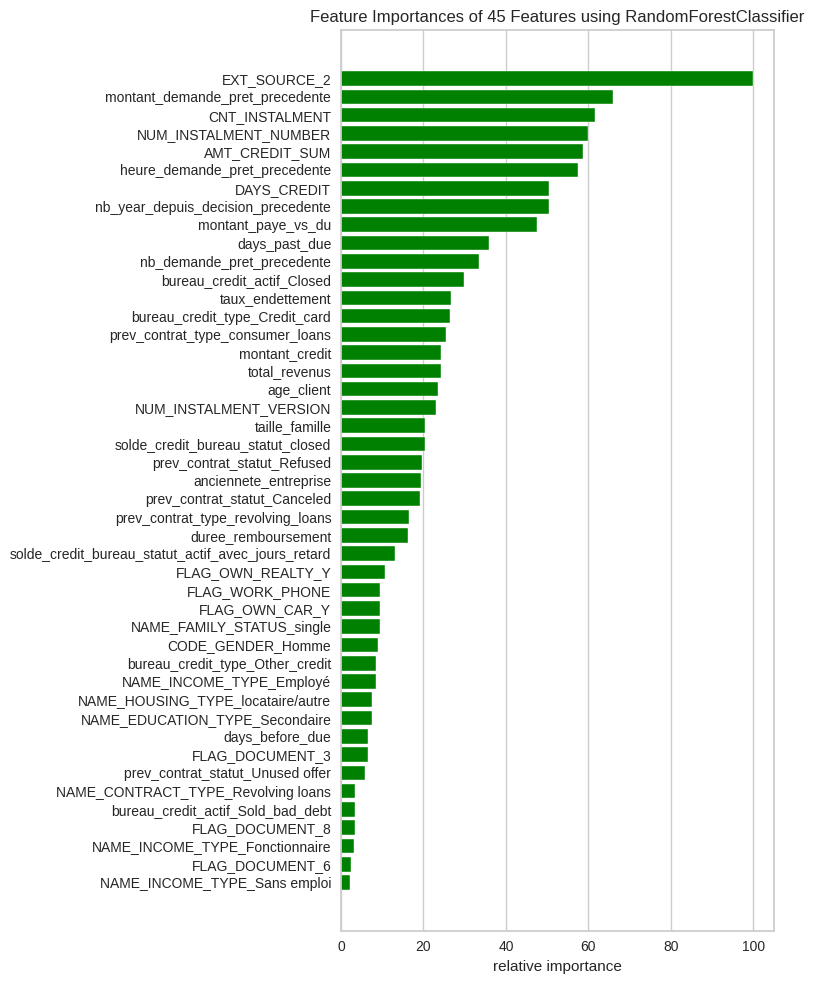

<Axes: title={'center': 'Feature Importances of 45 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [70]:
from yellowbrick.model_selection import FeatureImportances

rfr_model = RandomForestClassifier(n_estimators=10, random_state=101)

fig, ax = plt.subplots(figsize=(8, 10))

fi_viz = FeatureImportances(rfr_model, labels=X_train_sd_df.columns, colors=["green"])

fi_viz.fit(X_train_sd, y_train)

fi_viz.show()

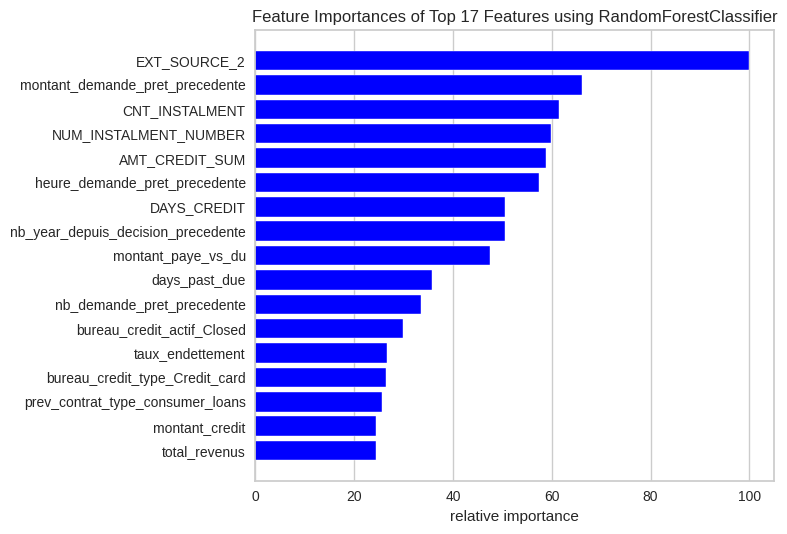

<Axes: title={'center': 'Feature Importances of Top 17 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [71]:
fi_viz = FeatureImportances(rfr_model, labels=X_train_sd_df.columns, topn=17, colors=["blue"])

fi_viz.fit(X_train_sd, y_train)

fi_viz.show()

## 5.b **Recursive Feature Selection (RFE) using Random Forests Importance**


La méthode **Recursive Feature Elimination (RFE)** est une technique de sélection de variables qui utilise un modèle pour identifier et éliminer de manière itérative les variables les moins importantes. Lorsqu'elle est combinée avec l'importance des variables des Random Forests, elle devient une méthode Embedded.

**Étapes principales :**


1. Entraîner un modèle Random Forest sur les données.
2. Obtenir les importances des variables.
3. Supprimer la variable ayant la plus faible importance.
4. Répéter le processus jusqu'à ce qu'un nombre cible de variables soit atteint ou qu'une condition d'arrêt soit satisfaite.

**Avantages :**
- Combine les avantages de l'importance des variables et de la sélection récursive.
- Élimine les variables non pertinentes ou redondantes.

**Inconvénients :**
- Plus coûteux en calcul que l'évaluation directe de l'importance des variables.
- La performance dépend de l'algorithme utilisé et des hyperparamètres du modèle.

---


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [73]:
sel_ = RFE(RandomForestClassifier(n_estimators=10, random_state=101))
sel_.fit(X_train_sd, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=101))

In [74]:
sel_.get_support()

array([False,  True, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False])

In [75]:
selected_feat_rfe = X_train_sd_df.columns[(sel_.get_support())]

len(selected_feat_rfe)

22

In [76]:
selected_feat_rfe

Index(['EXT_SOURCE_2', 'taille_famille', 'anciennete_entreprise', 'age_client',
       'taux_endettement', 'total_revenus', 'montant_credit',
       'nb_demande_pret_precedente', 'montant_demande_pret_precedente',
       'heure_demande_pret_precedente', 'nb_year_depuis_decision_precedente',
       'prev_contrat_type_consumer_loans', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'montant_paye_vs_du', 'days_past_due',
       'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'bureau_credit_actif_Closed',
       'bureau_credit_type_Credit_card', 'solde_credit_bureau_statut_closed',
       'CNT_INSTALMENT'],
      dtype='object')

Feature: 0, Score: 0.11439
Feature: 1, Score: 0.02389
Feature: 2, Score: 0.02280
Feature: 3, Score: 0.02150
Feature: 4, Score: 0.02947
Feature: 5, Score: 0.02820
Feature: 6, Score: 0.02761
Feature: 7, Score: 0.03990
Feature: 8, Score: 0.07853
Feature: 9, Score: 0.06485
Feature: 10, Score: 0.05664
Feature: 11, Score: 0.02780
Feature: 12, Score: 0.02328
Feature: 13, Score: 0.06962
Feature: 14, Score: 0.05411
Feature: 15, Score: 0.04082
Feature: 16, Score: 0.05582
Feature: 17, Score: 0.06739
Feature: 18, Score: 0.03142
Feature: 19, Score: 0.02868
Feature: 20, Score: 0.02395
Feature: 21, Score: 0.06934


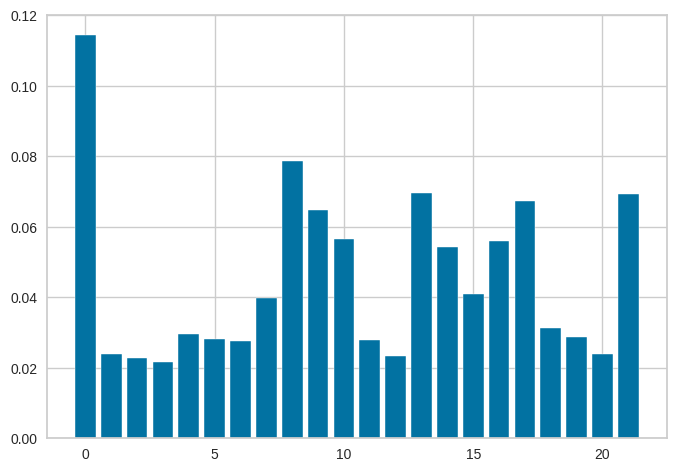

In [77]:
importance = sel_.estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Comparaison des perf entre les deux modeles

In [78]:
def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=200, random_state=101, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [79]:
X_valid_sd_df = pd.DataFrame(X_valid_sd, columns=list(X_valid.drop(labels='SK_ID_CURR', axis=1)))
y_valid_series = pd.Series(y_valid)

In [82]:
# features selected recursively
run_randomForests(X_train_sd_df[selected_feat_rfe],
                  X_valid_sd_df[selected_feat_rfe],
                  y_train_series, y_valid_series)


Train set
Random Forests roc-auc: 0.6969010240784578
Test set
Random Forests roc-auc: 0.6911070716198084


In [83]:
# features selected altogether
run_randomForests(X_train_sd_df[selected_feat],
                  X_valid_sd_df[selected_feat],
                  y_train_series, y_valid_series)

Train set
Random Forests roc-auc: 0.6905351384571725
Test set
Random Forests roc-auc: 0.6830503263618566


In [84]:
selected_feat_rfe=['SK_ID_CURR','EXT_SOURCE_2', 'taille_famille', 'anciennete_entreprise', 'age_client',
       'taux_endettement', 'total_revenus', 'montant_credit',
       'nb_demande_pret_precedente', 'montant_demande_pret_precedente',
       'heure_demande_pret_precedente', 'nb_year_depuis_decision_precedente',
       'prev_contrat_type_consumer_loans', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'montant_paye_vs_du', 'days_past_due',
       'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'bureau_credit_actif_Closed',
       'bureau_credit_type_Credit_card', 'solde_credit_bureau_statut_closed',
       'CNT_INSTALMENT']

In [85]:
X_train_clean = X_train[selected_feat_rfe]
X_test_clean = X_test[selected_feat_rfe]
###X_train_clean = X_train[selected_feat_rfe]
###X_test_clean = X_test[selected_feat_rfe]
X_train_clean.shape, X_test_clean.shape

((307511, 23), (48744, 23))

In [86]:
selected_feat_rfe

['SK_ID_CURR',
 'EXT_SOURCE_2',
 'taille_famille',
 'anciennete_entreprise',
 'age_client',
 'taux_endettement',
 'total_revenus',
 'montant_credit',
 'nb_demande_pret_precedente',
 'montant_demande_pret_precedente',
 'heure_demande_pret_precedente',
 'nb_year_depuis_decision_precedente',
 'prev_contrat_type_consumer_loans',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'montant_paye_vs_du',
 'days_past_due',
 'DAYS_CREDIT',
 'AMT_CREDIT_SUM',
 'bureau_credit_actif_Closed',
 'bureau_credit_type_Credit_card',
 'solde_credit_bureau_statut_closed',
 'CNT_INSTALMENT']

In [87]:
# Sauvegarde des datasets
path_clean_X_train_features = '/content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/X_train_feautres.csv'
path_clean_X_test_feautres = '/content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/X_test_feautres.csv'
path_y='/content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/y.csv'


X_train_clean.to_csv(path_clean_X_train_features, encoding='utf-8', index=None)
X_test_clean.to_csv(path_clean_X_test_feautres, encoding='utf-8', index=None)
y.to_csv(path_y, encoding='utf-8', index=None)



print(f"Les fichiers ont été sauvegardés avec succès :\n- X_train_clean : {path_clean_X_train_features}\n- X_test_clean : {path_clean_X_test_feautres}\n- y : {path_y}")


Les fichiers ont été sauvegardés avec succès :
- X_train_clean : /content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/X_train_feautres.csv
- X_test_clean : /content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/X_test_feautres.csv
- y : /content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/y.csv


In [88]:
X_train_clean.shape, X_test_clean.shape

((307511, 23), (48744, 23))

In [89]:
# Combinaison dans un seul DataFrame
df = X_train_clean.copy()
df['TARGET'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          307511 non-null  int64  
 1   EXT_SOURCE_2                        307511 non-null  float64
 2   taille_famille                      307511 non-null  int8   
 3   anciennete_entreprise               307511 non-null  uint8  
 4   age_client                          307511 non-null  int8   
 5   taux_endettement                    307511 non-null  int8   
 6   total_revenus                       307511 non-null  uint8  
 7   montant_credit                      307511 non-null  int8   
 8   nb_demande_pret_precedente          307511 non-null  float64
 9   montant_demande_pret_precedente     307511 non-null  float64
 10  heure_demande_pret_precedente       307511 non-null  float64
 11  nb_year_depuis_decision_pr

In [91]:
path_df = '/content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/df.csv'
df.to_csv(path_df, encoding='utf-8', index=None)
print(f"Les fichiers ont été sauvegardés avec succès :\n-df : {path_df}")


Les fichiers ont été sauvegardés avec succès :
-df : /content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/df.csv


In [92]:
df.shape

(307511, 24)